# Lab 2

## Splitting the Dataset

In order to train and test a machine learning model, we need to split the `iris` dataset into training and testing. The function `train_test_split` extracts 75% of the rows in the data (with labels) as the training set, and the remaining 25% (with labels) as the testing set. The function also _shuffles_ the data, as if we were to extract the data in order, all the items in the testing set would have label 2. We also give the function a seed using the `random_state` parameter, to ensure we get the same result if we perform the function several times.

The result is stored in the `X_train`,`X_test`, `y_train`,`y_test` NumPy arrays.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)

We use the `shape` method to shape the data into a format that can be more easily interpreted by `scikit`. We add the method to the X training and testing datasets

In [2]:
X_train.shape

(112, 4)

In [3]:
X_test.shape

(38, 4)

In [4]:
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


## Building a Model

We can use the K-nearest-neighbours algorithm in our model before we perform any predictions. We can create a `knn` object using the `KNeighborsClassifier`, which specifies the number of neighbours.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

This `knn` object encapsulates the algorithm to build the model from the training set, *as well as* the algorithm to make predictions on test samples.

In the case of the `KNeighborsClassifier`, however, it just stores the training set (as we use a transductive algorithm)

We then call the `fit` method, which takes in the training sets and builds a model from that, returning a `KNeighborsClassifier` object.

In [6]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Making Predictions

Here we begin to make predictions. We can create a sample as a NumPy array, representing an iris with `sepal_length` of 5cm, `sepal_width` of 2.9cm, `petal_length` of 1cm, and a `petal_width` of 0.2cm.

In [7]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

We use the `predict` method on the `knn` object to generate a prediction for the **class** of the new sample. At first, the model returns 0 as that is the array representation of the class `setosa`

In [8]:
prediction = knn.predict(X_new)
print(prediction)

[0]


In [9]:
print(iris['target_names'][prediction])

['setosa']


## Evaluating a Model

Here we make a prediction, and compare it against its **label** (the known species). We measure the accuracy of the model using the fraction of flowers for which the right species was predicted.

In [10]:
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.9736842105263158

In [11]:
knn.score(X_test, y_test)

0.9736842105263158

Altogether:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9736842105263158

This snippet encompasses the entire process for applying *any* machine learning algorithm. The `fit`, `predict` and `score` methods are commonly used for **supervised learning**.

## Loading Data from a File

In [13]:
X = np.genfromtxt("iris_data.txt")
X[:3,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

# Exercises

1. If we run `y_pred == y_test` we get:

In [14]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

Which is an `array` of Boolean values. These represent the different cases where each value of the predicted `y` is equal to the test `y`. Of these, 37 are correct and 1 is incorrect. This gives us a score of $\frac{37}{38}$, or $0.9736...$

2. To check the error rate of the K-nearest neighbour as $K$ increases, we can create different modules, and store the results in an array, then plot the various error rates on a graph.

([<matplotlib.axis.XTick at 0x7f00adb42850>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

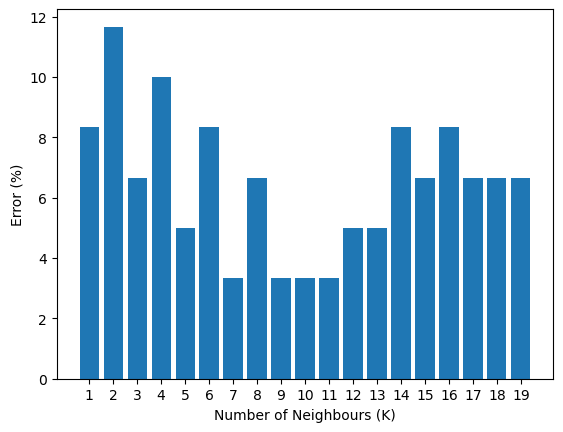

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0, test_size=0.4)
error_list = np.zeros(19)

for i in range(1,20):
    knn_test = KNeighborsClassifier(n_neighbors=i)
    knn_test.fit(X_train, y_train)
    plt.show()
    error = 1 - (knn_test.score(X_test, y_test))
    error_list[i-1] = error * 100

k = np.arange(1, len(error_list)+1)

plt.bar(k, error_list)
plt.xlabel("Number of Neighbours (K)")
plt.ylabel("Error (%)")
plt.xticks(range(1,20))

Here we can observe how the value of $K$ affects the error percentage on a slightly larger testing set, and that the most stable values of are 7, 9,10 and 11.

3. First, let us check the number of entries that are the same:

In [16]:
np.mean(iris['data'] == X)

0.995

Let's check which entries are different using some inefficient code.

In [17]:
intersect = (iris['data'] == X)

for i in range(0, len(intersect)):
    for entry in intersect[i]:
        if not entry:
            print("iris entry:", iris['data'][i], "\tFile entry: ", X[i])
            break

iris entry: [4.9 3.1 1.5 0.2] 	File entry:  [4.9 3.1 1.5 0.1]
iris entry: [4.9 3.6 1.4 0.1] 	File entry:  [4.9 3.1 1.5 0.1]


Here we can examine the difference between the iris dataset and the given file. 